# **Transfer Learning**

Transfer Learning is a clever machine learning technique where a model trained for a particular task is used for another task.


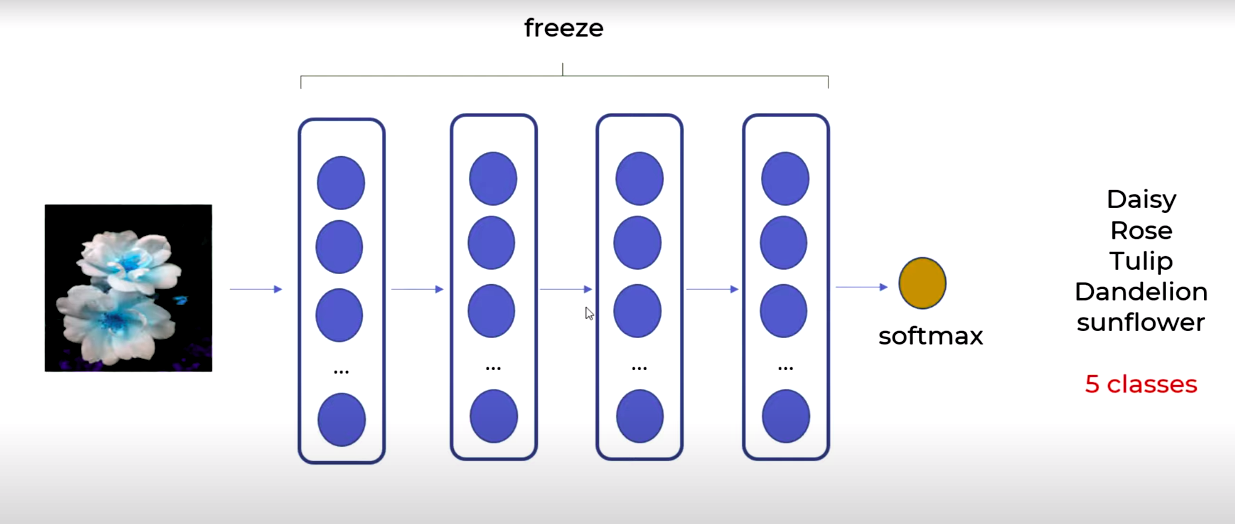


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import PIL
import os

**Importing The Flowers Dataset**

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('daisy/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/4837182901_69a6cc782b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3758221664_b19116d61f.jpg'),
 PosixPath('datasets/flower_photos/daisy/538920244_59899a78f8_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3773181799_5def396456.jpg'),
 PosixPath('datasets/flower_photos/daisy/2612704455_efce1c2144_m.jpg')]

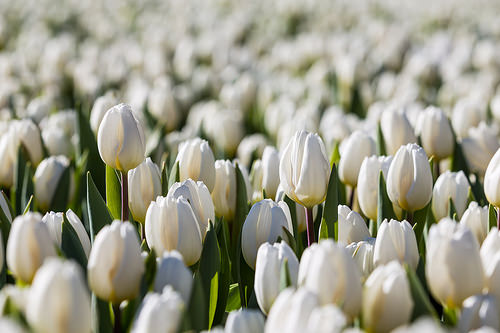

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

In [8]:
images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [9]:
import cv2
img=cv2.imread(str(images_dict['roses'][0]))
img.shape

(240, 320, 3)

In [10]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [11]:
images_dict.items()

dict_items([('roses', [PosixPath('datasets/flower_photos/roses/3475572132_01ae28e834_n.jpg'), PosixPath('datasets/flower_photos/roses/19566556880_476c66c5ee_n.jpg'), PosixPath('datasets/flower_photos/roses/8524505868_236f4c94b5.jpg'), PosixPath('datasets/flower_photos/roses/4881402397_1c664af2f7_n.jpg'), PosixPath('datasets/flower_photos/roses/6969041818_a505baa68e_m.jpg'), PosixPath('datasets/flower_photos/roses/9353111163_7a89b2df35_n.jpg'), PosixPath('datasets/flower_photos/roses/8502529435_c6e40d0df4.jpg'), PosixPath('datasets/flower_photos/roses/2788276815_8f730bd942.jpg'), PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'), PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'), PosixPath('datasets/flower_photos/roses/3526860692_4c551191b1_m.jpg'), PosixPath('datasets/flower_photos/roses/1949195327_75f76c12b1.jpg'), PosixPath('datasets/flower_photos/roses/14312910041_b747240d56_n.jpg'), PosixPath('datasets/flower_photos/roses/8742493617_c2a9bf854

In [12]:
#Resizing all the images
X,y=[],[]
for flower_name,image_path in images_dict.items():
  for path in image_path:
    img=cv2.imread(str(path))
    resized_img=cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(labels_dict[flower_name])

In [13]:
X=np.array(X)
y=np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
#scaling data images
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [16]:
#Calling the imported model for classification
X[0].shape

(224, 224, 3)

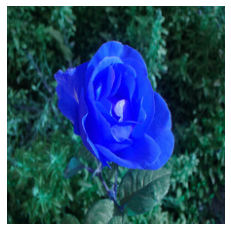

In [17]:
plt.axis('off')
plt.imshow(X[0])

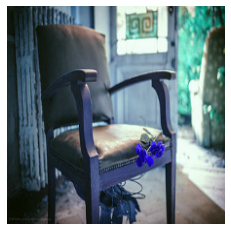

In [18]:
plt.axis('off')
plt.imshow(X[1])

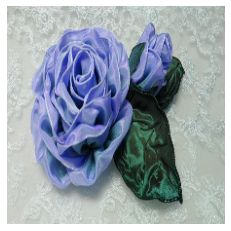

In [19]:
plt.axis('off')
plt.imshow(X[2])

In [20]:
#Creating Our Own CNN Model
model_own=Sequential([
                layers.Conv2D(16,(3,3),padding='same',activation='relu'),
                layers.MaxPool2D((2,2)),
                layers.Conv2D(32,3,padding='same',activation='relu'),
                layers.MaxPool2D((2,2)),
                layers.Conv2D(64,3,padding='same',activation='relu'),
                layers.MaxPool2D((2,2)),
                layers.Flatten(),
                layers.Dense(128,activation='relu'),
                layers.Dense(5,activation='softmax')])

model_own.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

model_own.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 119s 1s/step - loss: 1.6247 - accuracy: 0.3731
Epoch 2/10
86/86 [==============================] - 114s 1s/step - loss: 1.0608 - accuracy: 0.5917
Epoch 3/10
86/86 [==============================] - 114s 1s/step - loss: 0.8693 - accuracy: 0.6669
Epoch 4/10
86/86 [==============================] - 115s 1s/step - loss: 0.5729 - accuracy: 0.7835
Epoch 5/10
86/86 [==============================] - 119s 1s/step - loss: 0.3594 - accuracy: 0.8849
Epoch 6/10
86/86 [==============================] - 115s 1s/step - loss: 0.2023 - accuracy: 0.9407
Epoch 7/10
86/86 [==============================] - 116s 1s/step - loss: 0.0895 - accuracy: 0.9763
Epoch 8/10
86/86 [==============================] - 115s 1s/step - loss: 0.0562 - accuracy: 0.9877
Epoch 9/10
86/86 [==============================] - 115s 1s/step - loss: 0.0395 - accuracy: 0.9907
Epoch 10/10
86/86 [==============================] - 115s 1s/step - loss: 0.0441 - accuracy: 0.9904


In [21]:
model_own.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (32, 224, 224, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 112, 112, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 112, 112, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 56, 56, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 56, 56, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 28, 28, 64)          0         
_________________________________________________________________
flatten (Flatten)            (32, 50176)               0

In [22]:
model_own.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 395ms/step - loss: 1.8368 - accuracy: 0.6612


[1.8368334770202637, 0.6612200140953064]

*Since, the test accuracy of our custom model is very low as that of train accuracy. So, this is a clear case of overfitting. Now, let's try to improve our test accuracy by using a pre-trained model*

**Importing A Pre-Trained Model**

In [23]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [24]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [25]:
model_pretrained = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(5)    # 5 denotes the number of categories of flowers.
])

model_pretrained.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])

model_pretrained.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 93s 1s/step - loss: 1.1646 - accuracy: 0.5299
Epoch 2/5
86/86 [==============================] - 88s 1s/step - loss: 0.4167 - accuracy: 0.8591
Epoch 3/5
86/86 [==============================] - 88s 1s/step - loss: 0.3414 - accuracy: 0.8849
Epoch 4/5
86/86 [==============================] - 88s 1s/step - loss: 0.2602 - accuracy: 0.9243
Epoch 5/5
86/86 [==============================] - 88s 1s/step - loss: 0.2162 - accuracy: 0.9410


In [26]:
model_pretrained.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 30s 1s/step - loss: 0.3469 - accuracy: 0.8715


[0.34692516922950745, 0.8714597225189209]

*Thus, by the use of per-trained model for image classificaction, we improved our model's performance through a huge range. This ia an advantage of Transfer Learning.*